In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r "/content/gdrive/MyDrive/dataset.zip" "/content"

In [ ]:
import zipfile
archive = zipfile.ZipFile('/content/dataset.zip')
archive.extractall('/content')

In [ ]:
from IPython import display
print("Original Vs New Dataset Structure")
display.Image('original vs new_dataset.png')

Original Vs New Dataset Structure


In [ ]:
dataset_dir = '/content/dataset'
train_dataset_dir = '/content/dataset/train'
test_dataset_dir = '/content/dataset/test'

In [ ]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
categories = ['real','spoof']

In [ ]:
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dataset_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dataset_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 18055 images in real directory
There are 12625 images in spoof directory
There are 30680 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 6598 images in real directory
There are 4435 images in spoof directory
There are 11033 total images in testing directory


In [ ]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [ ]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()


In [ ]:
training_image_path = get_images(data_dir= train_dataset_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/dataset/train/real/10451trainreal.jpg', '/content/dataset/train/real/8249trainreal.jpg', '/content/dataset/train/real/5717trainreal.jpg', '/content/dataset/train/real/578trainreal.jpg', '/content/dataset/train/real/6088trainreal.jpg', '/content/dataset/train/real/5009trainreal.jpg', '/content/dataset/train/real/3474trainreal.jpg', '/content/dataset/train/real/2985trainreal.jpg', '/content/dataset/train/real/1168trainreal.jpg', '/content/dataset/train/real/1551trainreal.jpg', '/content/dataset/train/real/16611trainreal.jpg', '/content/dataset/train/real/11299trainreal.jpg', '/content/dataset/train/real/4673trainreal.jpg', '/content/dataset/train/real/10088trainreal.jpg', '/content/dataset/train/real/10949trainreal.jpg', '/content/dataset/train/real/5750trainreal.jpg', '/content/dataset/train/real/11821trainreal.jpg', '/content/dataset/train/real/16364trainreal.jpg', '/content/dataset/train/real/1573trainreal.jpg', '/content/dataset/train/real/7914trainreal.jpg', '/content/dat

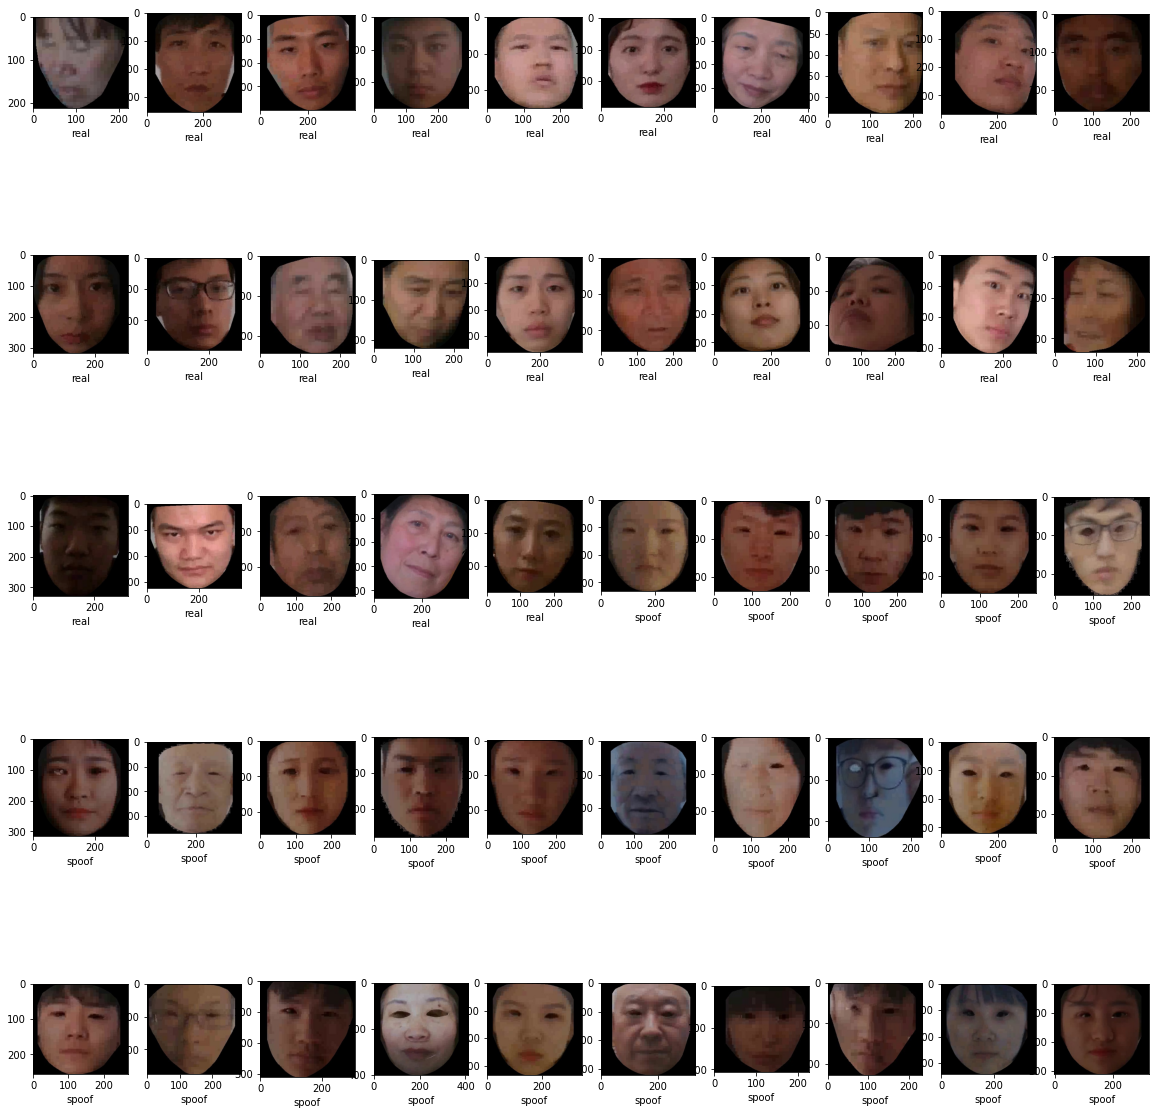

In [ ]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

In [ ]:
testing_image_path = get_images(data_dir= test_dataset_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['/content/dataset/test/real/2199testreal.jpg', '/content/dataset/test/real/1987testreal.jpg', '/content/dataset/test/real/2550testreal.jpg', '/content/dataset/test/real/5342testreal.jpg', '/content/dataset/test/real/2360testreal.jpg', '/content/dataset/test/real/998testreal.jpg', '/content/dataset/test/real/1826testreal.jpg', '/content/dataset/test/real/4390testreal.jpg', '/content/dataset/test/real/4819testreal.jpg', '/content/dataset/test/real/296testreal.jpg', '/content/dataset/test/real/6368testreal.jpg', '/content/dataset/test/real/5518testreal.jpg', '/content/dataset/test/real/5498testreal.jpg', '/content/dataset/test/real/330testreal.jpg', '/content/dataset/test/real/3836testreal.jpg', '/content/dataset/test/real/2465testreal.jpg', '/content/dataset/test/real/3146testreal.jpg', '/content/dataset/test/real/3265testreal.jpg', '/content/dataset/test/real/5985testreal.jpg', '/content/dataset/test/real/4073testreal.jpg', '/content/dataset/test/real/6250testreal.jpg', '/content/datas

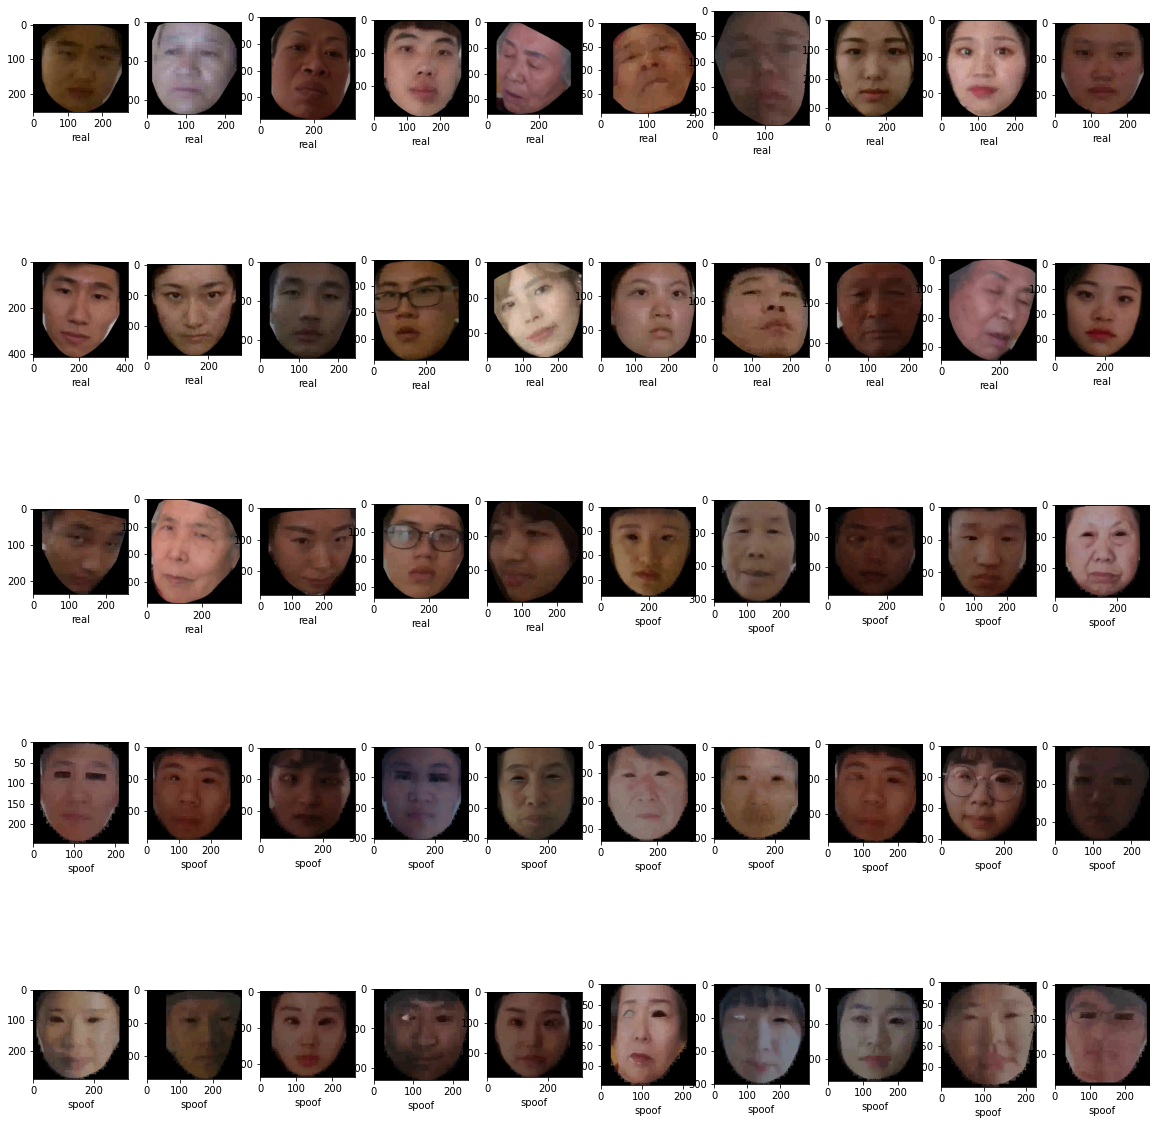

In [ ]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,Input,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import model_from_json
import  json

In [ ]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dataset_dir,target_size=(224,224),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 30680 images belonging to 2 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(test_dataset_dir,target_size=(224,224),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 11033 images belonging to 2 classes.


In [ ]:
vggnet =VGG16(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vggnet.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vggnet.trainable=False

In [ ]:
output=Flatten()(vggnet.output)
output=Dropout(0.5)(output)
prediction = Dense(1,activation='sigmoid')(output)

In [ ]:
model = Model(inputs = vggnet.input,outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [ ]:
import os
os.mkdir('/content/model_weights/')

In [ ]:
model_checkpoint = ModelCheckpoint('./model_weights/dataset{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // 25,
    epochs = 30,
    callbacks=[model_checkpoint])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
1227/1227 [==============================] - ETA: 0s - loss: 0.7735 - accuracy: 0.5119
Epoch 1: val_loss improved from inf to 0.68005, saving model to ./model_weights/dataset01-0.594830.h5
1227/1227 [==============================] - 544s 433ms/step - loss: 0.7735 - accuracy: 0.5119 - val_loss: 0.6800 - val_accuracy: 0.5948
Epoch 2/30
1227/1227 [==============================] - ETA: 0s - loss: 0.7383 - accuracy: 0.5441
Epoch 2: val_loss improved from 0.68005 to 0.66937, saving model to ./model_weights/dataset02-0.596281.h5
1227/1227 [==============================] - 537s 437ms/step - loss: 0.7383 - accuracy: 0.5441 - val_loss: 0.6694 - val_accuracy: 0.5963
Epoch 3/30
1227/1227 [==============================] - ETA: 0s - loss: 0.7189 - accuracy: 0.5627
Epoch 3: val_loss improved from 0.66937 to 0.65912, saving model to ./model_weights/dataset03-0.597460.h5
1227/1227 [==============================] - 529s 431ms/step - loss: 0.7189 - accuracy: 0.5627 - val_loss: 0.6591 - va

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(224,224))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [ ]:
check_fakes(test_dataset_dir,categories[0])

In [ ]:
check_fakes(test_dataset_dir,categories[1])

In [ ]:
(6583+3186)/(6365+233+1249+3189)*100